importation of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

uploading my data

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


split my data to have features and target

In [4]:
x=df.drop("Purchased",axis=1).values
y=df["Purchased"].values

In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

split my features to train_dataset and test_dataset

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_test.shape[0]/x.shape[0]

0.2

Standarisation of data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()

In [10]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

modeling the data using LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()

In [13]:
model.fit(x_train,y_train)

LogisticRegression()

evaluation of model

In [14]:
model.predict(sc.transform([[19,19000]]))

array([0], dtype=int64)

In [15]:
model.predict(x_test).shape

(80,)

In [16]:
 from sklearn.metrics import confusion_matrix

<Axes: >

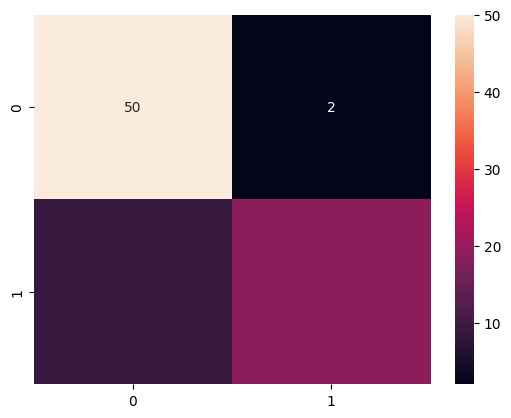

In [17]:

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

visualizing the training set result

In [18]:
from matplotlib.colors import ListedColormap

In [19]:
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
    np.arange(start=x_set[:, 1].min() - 10, stop=x_set[:, 1].max() + 10, step=0.25)
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36780\1213991410.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)


Text(0.5, 1.0, 'logistic regression')

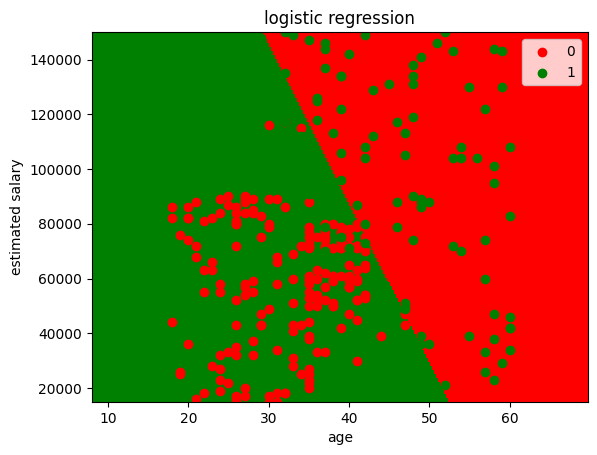

In [20]:
plt.contourf(x1,x2,model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),cmap=ListedColormap(("green","red")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)
plt.legend()    
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.title("logistic regression")

visualizing the test set result

In [21]:
x_set,y_set=sc.inverse_transform(x_test),y_test
x1,x2=np.meshgrid(np.arange(x_set[:,0].min()-10,x_set[:,0].max()+10,0.25),
                   np.arange(x_set[:,1].min()-10,x_set[:,1].max()+10,0.25))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36780\3769925962.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],cmap=ListedColormap(("yellow","blue"))(i),label=j)


Text(0, 0.5, 'estimated salary')

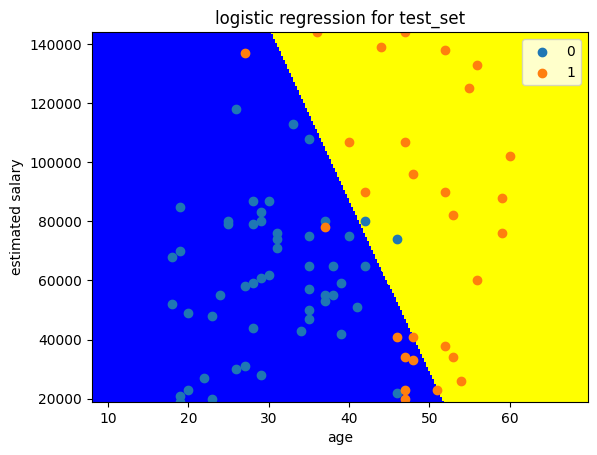

In [22]:
plt.contourf(x1,x2,model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),cmap=ListedColormap(("blue","yellow")))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],cmap=ListedColormap(("yellow","blue"))(i),label=j)
plt.title("logistic regression for test_set")
plt.legend()
plt.xlabel("age")
plt.ylabel("estimated salary")